In [ ]:
# Mengaitkan dan mengakses Google Drive ke dalam lingkungan kerja Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  Mengekstrak isi dari file zip Brain-Tumor ke dalam direktori saat ini di Colab
!unzip -o /content/drive/MyDrive/AILO/Brain-Tumor.zip

Archive:  /content/drive/MyDrive/AILO/Brain-Tumor.zip
   creating: test/glioma_tumor/
  inflating: test/glioma_tumor/image(1).jpg  
  inflating: test/glioma_tumor/image(10).jpg  
  inflating: test/glioma_tumor/image(100).jpg  
  inflating: test/glioma_tumor/image(11).jpg  
  inflating: test/glioma_tumor/image(12).jpg  
  inflating: test/glioma_tumor/image(13).jpg  
  inflating: test/glioma_tumor/image(14).jpg  
  inflating: test/glioma_tumor/image(15).jpg  
  inflating: test/glioma_tumor/image(16).jpg  
  inflating: test/glioma_tumor/image(17).jpg  
  inflating: test/glioma_tumor/image(18).jpg  
  inflating: test/glioma_tumor/image(19).jpg  
  inflating: test/glioma_tumor/image(2).jpg  
  inflating: test/glioma_tumor/image(20).jpg  
  inflating: test/glioma_tumor/image(21).jpg  
  inflating: test/glioma_tumor/image(22).jpg  
  inflating: test/glioma_tumor/image(23).jpg  
  inflating: test/glioma_tumor/image(24).jpg  
  inflating: test/glioma_tumor/image(25).jpg  
  inflating: test/glio

In [ ]:
import os # Modul ini menyediakan fungsi-fungsi yang memungkinkan interaksi dengan sistem operasi, termasuk operasi pada file dan direktori
import random # Modul ini menyediakan fungsi-fungsi untuk menghasilkan nilai acak
import shutil # Modul ini menyediakan fungsi-fungsi tingkat tinggi untuk operasi file dan direktori

def create_val_folder(train_folder, val_folder, val_percentage):
    # Membuat folder val jika belum ada
    if not os.path.exists(val_folder):
        os.makedirs(val_folder)

    # Mengambil daftar subfolder (kelas) di dalam folder train
    classes = os.listdir(train_folder)

    for class_name in classes:
        train_class_folder = os.path.join(train_folder, class_name)
        val_class_folder = os.path.join(val_folder, class_name)

        # Membuat subfolder val untuk setiap kelas jika belum ada
        if not os.path.exists(val_class_folder):
            os.makedirs(val_class_folder)

        # Mengambil daftar gambar di dalam subfolder train untuk setiap kelas
        images = os.listdir(train_class_folder)

        # Menghitung jumlah gambar yang akan dipindahkan ke val
        num_val_images = int(len(images) * val_percentage)
        val_images = random.sample(images, num_val_images)

        # Memindahkan gambar ke subfolder val
        for val_image in val_images:
            src_path = os.path.join(train_class_folder, val_image)
            dest_path = os.path.join(val_class_folder, val_image)
            shutil.move(src_path, dest_path)

if __name__ == "__main__":
    # Atur path folder train dan val
    train_folder_path = "/content/train"
    val_folder_path = "/content/val"

    # Atur persentase gambar untuk val (misalnya, 10%)
    val_percentage = 0.1

    # Buat subfolder val dan pindahkan gambar
    create_val_folder(train_folder_path, val_folder_path, val_percentage)

In [ ]:
import os
import cv2

train_dir = "/content/train"

categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

size_threshold = (10,10)

valid_extensions=('.jpg', '.png', '.jpeg')


# # Fungsi untuk memeriksa apakah gambar rusak
def is_image_corrupt(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return True
        return False
    except:
        return True


# Fungsi untuk memeriksa apakah ukuran gambar di bawah ambang batas
def is_image_below_threshold(img_path):
    img = cv2.imread(image_path)
    if img.shape <= size_threshold:
        print(img.shape)
        return True
    return False


# Loop melalui setiap kategori
for each_category in categories:
    folder_path = os.path.join(train_dir, each_category)

    # Loop melalui setiap file di setiap kategori
    for each_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, each_file)

        # Memeriksa apakah file adalah file gambar yang valid
        if os.path.isfile(image_path) and each_file.lower().endswith(valid_extensions):

            # Memeriksa apakah gambar rusak atau di bawah ambang batas
            if is_image_corrupt(image_path) or is_image_below_threshold(image_path):

                # Menghapus gambar yang rusak atau di bawah ambang batas
                os.remove(image_path)
                print(f"Removed corrupt image: {each_file}")

In [ ]:
import os

# Fungsi untuk menghitung jumlah gambar dalam suatu folder
def count_images_in_folder(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        count += len(files)
    return count

# Fungsi untuk menghitung jumlah gambar dalam set pelatihan, pengujian, dan validasi
def count_images_in_each_set(train_folder, test_folder, val_folder):
    train_count = count_images_in_folder(train_folder)
    test_count = count_images_in_folder(test_folder)
    val_count = count_images_in_folder(val_folder)

    return train_count, test_count, val_count

if __name__ == "__main__":
    # Atur path folder train, test, dan val
    train_folder_path = "/content/train"
    test_folder_path = "/content/test"
    val_folder_path = "/content/val"

    # Hitung jumlah gambar di setiap folder
    train_count, test_count, val_count = count_images_in_each_set(train_folder_path, test_folder_path, val_folder_path)

    # Tampilkan hasil
    print(f"Jumlah gambar di set pelatihan (train): {train_count}")
    print(f"Jumlah gambar di set pengujian (test): {test_count}")
    print(f"Jumlah gambar di set validasi (val): {val_count}")

Jumlah gambar di set pelatihan (train): 2585
Jumlah gambar di set pengujian (test): 394
Jumlah gambar di set validasi (val): 285


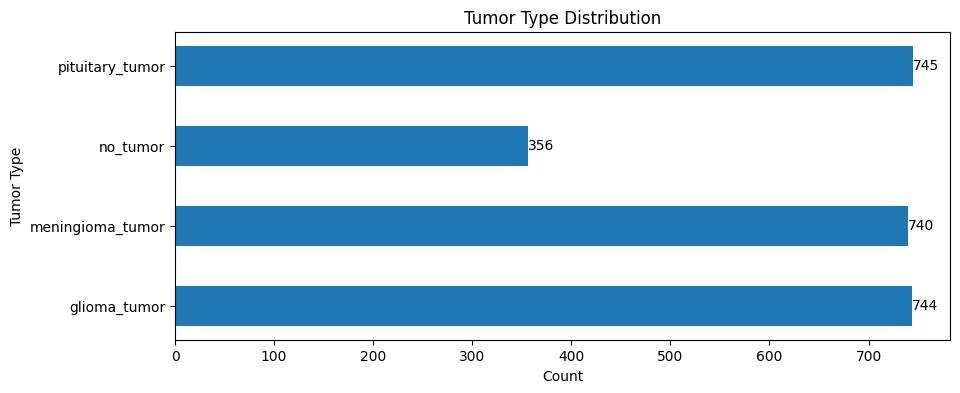

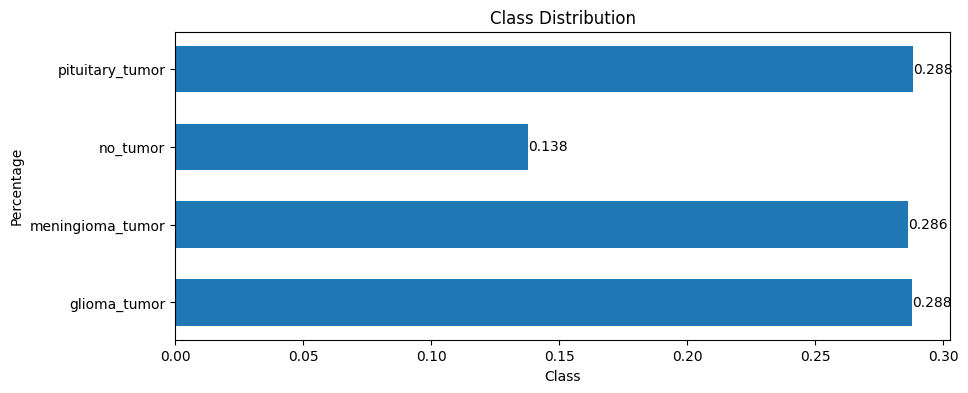

In [ ]:
import matplotlib.pyplot as plt
import os

train_dir = "/content/train"
valid_extensions=('.jpg', '.png', '.jpeg')

categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Dictionary untuk menyimpan jumlah gambar untuk setiap kategori
category_count = {}


# Menghitung jumlah gambar untuk setiap kategori
for each_category in categories:
    folder_path = os.path.join(train_dir, each_category)

    # Menggunakan list comprehension untuk mendapatkan file yang valid
    valid_images = [file for file in os.listdir(folder_path) if file.lower().endswith(valid_extensions)]
    category_count[each_category] = len(valid_images)


# Membuat subplot untuk bar chart
fig, ax = plt.subplots(figsize=(10, 4))

# Membuat bar chart untuk distribusi jenis tumor
bar_plot = plt.barh(list(category_count.keys()), list(category_count.values()), 0.5)
plt.title('Tumor Type Distribution')
plt.xlabel('Count')
plt.ylabel('Tumor Type')

# Menambahkan label pada bar chart
for i, bar in enumerate(bar_plot):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(list(category_count.values())[i]), ha='left', va='center')

plt.show()


# Menghitung jumlah total sampel
sample_size = sum(category_count.values())

# Menghitung distribusi kelas
class_dist = {key : val/sample_size for key, val in category_count.items()}

# Membuat subplot untuk bar chart distribusi kelas
fig, ax = plt.subplots(figsize=(10, 4))


# Membuat bar chart untuk distribusi kelas
bar_plot = plt.barh(list(class_dist.keys()), list(class_dist.values()), 0.6)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

# Menambahkan label pada bar chart
for i, bar in enumerate(bar_plot):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(round(list(class_dist.values())[i], 3)), ha='left', va='center')

plt.show()

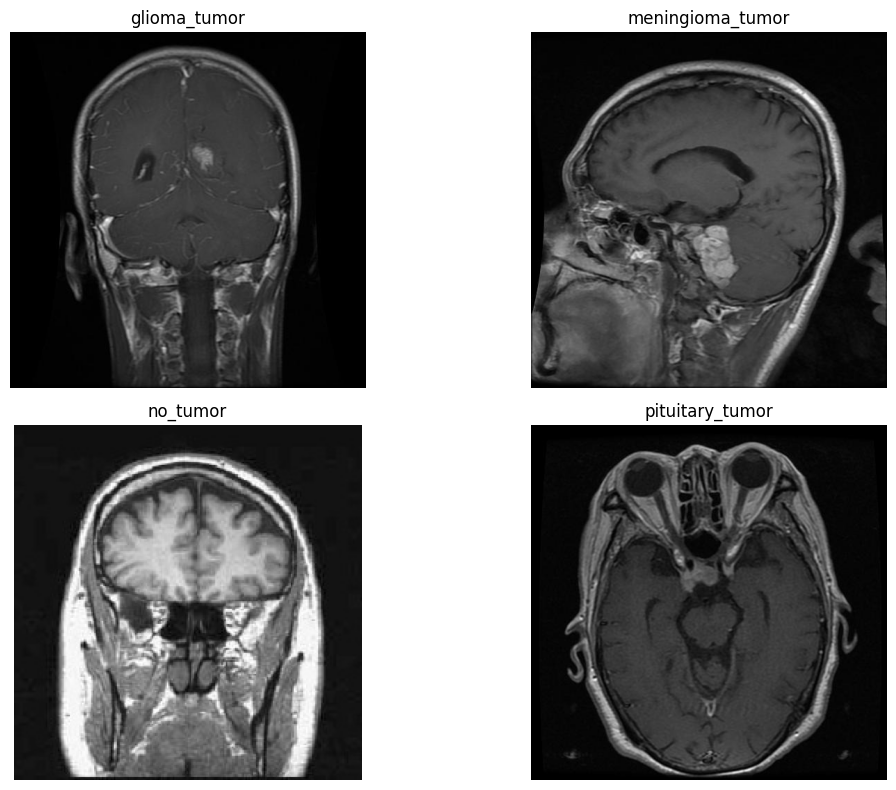

In [ ]:
import matplotlib.pyplot as plt
import os
train_dir = "/content/train"
valid_extensions=('.jpg', '.png', '.jpeg')

categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Membuat gambar subplot
plt.figure(figsize=(12, 8))

# Loop melalui setiap kategori
for i, category in enumerate(categories):

    # Path ke folder kategori
    folder_path = os.path.join(train_dir, category)

    # Mengambil path gambar pertama di setiap kategori
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])

    # Memeriksa apakah file adalah file gambar yang valid
    if not image_path.lower().endswith(valid_extensions):
        continue

    # Membaca gambar menggunakan matplotlib
    img = plt.imread(image_path)

    # Membuat subplot
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")

# Menata layout subplot
plt.tight_layout()
plt.show()

In [ ]:
import cv2

# Membaca gambar menggunakan OpenCV
img = cv2.imread('/content/train/glioma_tumor/gg (1).jpg')

# Mendapatkan dimensi gambar
img.shape

(512, 512, 3)

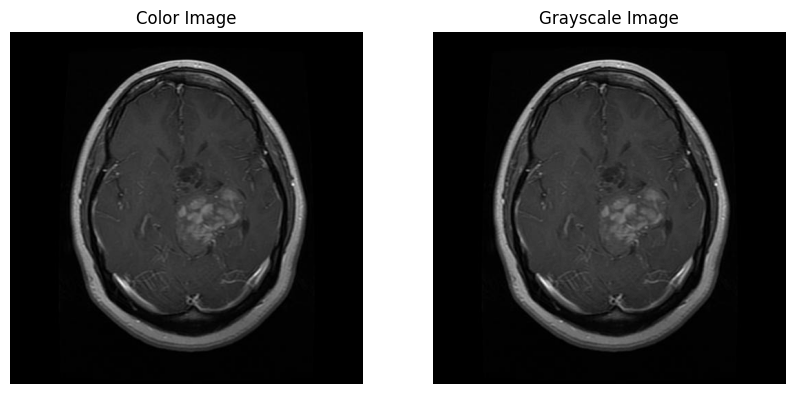

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Memuat gambar berwarna
color_image_path = '/content/train/glioma_tumor/gg (1).jpg'
color_image = cv2.imread(color_image_path)
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper visualization

# Konversi warna gambar ke abu-abu
grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)

# Membuat subplot untuk menampilkan gambar berwarna dan grayscale
plt.figure(figsize=(10, 5))

# Menampilkan gambar berwarna di subplot pertama
plt.subplot(1, 2, 1)
plt.imshow(color_image)
plt.title('Color Image')
plt.axis('off')

# Menampilkan citra grayscale di subplot kedua
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.4/660.4 kB 7.0 MB/s eta 0:00:00


In [ ]:
# Jika ingin menghapus folder di colab
!rm -rf /content/runs/

In [ ]:
from ultralytics import YOLO

# Membuat instance dari model YOLOv8 menggunakan file model 'yolov8m-cls.pt'
model = YOLO('yolov8m-cls.pt')

# Melatih atau menyetel kembali model pada dataset kami
model.train(data='/content', epochs=4)

Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content, epochs=4, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=

train: Scanning /content/train... 2585 images, 0 corrupt: 100%|██████████| 2585/2585 [00:00<?, ?it/s]

albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.30000000000000004, 1.7], hue=[-0.015, 0.015]), Normalize(p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)



val: Scanning /content/val... 285 images, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 4 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 11.35it/s]

                   all      0.916          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 12.27it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 10.61it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:00<00:00, 12.21it/s]

                   all      0.979          1



4 epochs completed in 0.024 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train/weights/best.pt, 31.7MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15767780 parameters, 0 gradients, 41.6 GFLOPs
train: /content/train... found 2585 images in 4 classes ✅ 
val: /content/val... found 285 images in 4 classes ✅ 
test: /content/test... found 394 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:01<00:00,  5.87it/s]


                   all      0.979          1
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e884d727670>
curves: []
curves_results: []
fitness: 0.9894737005233765
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9789474010467529, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9894737005233765}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.17867506596080043, 'inference': 2.8343401457134045, 'loss': 0.0007244578579015899, 'postprocess': 0.0007520642196922971}
task: 'classify'
top1: 0.9789474010467529
top5: 1.0

In [ ]:
# Prediksi dari data test dengan model hasil 3 epoch

from ultralytics import YOLO

def model_train():
    model = YOLO('./runs/classify/train/weights/best.pt')
    return model

def predict_image(file_path):
    model_data = model_train()
    result = model_data(file_path)
    return result[0].names[result[0].probs.top1]

if __name__ == "__main__":
    image_path = "/content/test/pituitary_tumor/image(5).jpg"
    prediction_result = predict_image(image_path)
    print("Prediction Result:", prediction_result)


image 1/1 /content/test/pituitary_tumor/image(5).jpg: 224x224 pituitary_tumor 0.99, no_tumor 0.01, meningioma_tumor 0.00, glioma_tumor 0.00, 6.4ms
Speed: 1.6ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Prediction Result: pituitary_tumor


In [ ]:
# Prediksi dari data test dengan model hasil 3 epoch

from ultralytics import YOLO

def model_train():
    model = YOLO('./runs/classify/train/weights/best.pt')
    return model

def predict_image(file_path):
    model_data = model_train()
    result = model_data(file_path)
    return result[0].names[result[0].probs.top1]

if __name__ == "__main__":
    image_path = "/content/test/no_tumor/image(100).jpg"
    prediction_result = predict_image(image_path)
    print("Prediction Result:", prediction_result)


image 1/1 /content/test/no_tumor/image(100).jpg: 224x224 no_tumor 1.00, meningioma_tumor 0.00, pituitary_tumor 0.00, glioma_tumor 0.00, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Prediction Result: no_tumor


In [ ]:
# Prediksi dari data internet dengan model hasil 3 epoch

from ultralytics import YOLO

def model_train():
    model = YOLO('./runs/classify/train/weights/best.pt')
    return model

def predict_image(file_path):
    model_data = model_train()
    result = model_data(file_path)
    return result[0].names[result[0].probs.top1]

if __name__ == "__main__":
    image_path = "/content/mt.jpg"
    prediction_result = predict_image(image_path)
    print("Prediction Result:", prediction_result)


image 1/1 /content/mt.jpg: 224x224 meningioma_tumor 0.67, no_tumor 0.32, pituitary_tumor 0.01, glioma_tumor 0.00, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Prediction Result: meningioma_tumor


In [ ]:
# # Prediksi dari data internet dengan model hasil 3 epoch

# from ultralytics import YOLO

# def model_train():
#     model = YOLO('./runs/classify/train/weights/best.pt')
#     return model

# def predict_image(file_path):
#     model_data = model_train()
#     result = model_data(file_path)
#     return result[0].names[result[0].probs.top1]

# if __name__ == "__main__":
#     image_path = "/content/pitu.jpeg"
#     prediction_result = predict_image(image_path)
#     print("Prediction Result:", prediction_result)

In [ ]:
# # Prediksi dari data internet dengan model hasil 5 epoch

# from ultralytics import YOLO

# def model_train():
#     model = YOLO('./runs/classify/train_5e/weights/best.pt')
#     return model

# def predict_image(file_path):
#     model_data = model_train()
#     result = model_data(file_path)
#     return result[0].names[result[0].probs.top1]

# if __name__ == "__main__":
#     image_path = "/content/mt.jpg"
#     prediction_result = predict_image(image_path)
#     print("Prediction Result:", prediction_result)
